# Connecticut Data Cleaning into .shp File

@authors: Blayde Omura and Lisa Jurca, USF all data retrieved 4/10/24:
- CT Census: https://redistrictingdatahub.org/dataset/connecticut-block-pl-94171-2020-by-table/
- CT Congressional Districts: https://redistrictingdatahub.org/dataset/2022-connecticut-congressional-districts-approved-plan/
- CT 2016 Precinct and Election Results: https://redistrictingdatahub.org/dataset/vest-2016-connecticut-precinct-and-election-results/

In [72]:
import pandas as pd
import geopandas as gpd
import maup
import time

Import the census file which has information about population, Hispanic, non hispanic details

In [73]:
start_time = time.time()
population_df = gpd.read_file("./ct_pl2020_b/ct_pl2020_p2_b.shp")
end_time = time.time()
print("The time to import ct_pl2020_p2_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import ct_pl2020_p2_b.shp is: 1.0446794827779133 mins


This second census file has voting age population (VAP), Hispanic and non-Hispanic details.

In [74]:
start_time = time.time()
vap_df= gpd.read_file("./ct_pl2020_b/ct_pl2020_p4_b.shp")
end_time = time.time()
print("The time to import ct_pl2020_p4_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import ct_pl2020_p4_b.shp is: 1.0079501191775004 mins


The data set below has 2016 presidential and senate election results by precinct

In [75]:
start_time = time.time()
election_df = gpd.read_file("./ct_vest_16/ct_vest_16.shp")
end_time = time.time()
print("The time to import ct_vest_20.shp is:",
      (end_time-start_time)/60, "mins")

The time to import ct_vest_20.shp is: 0.007380187511444092 mins


The data set below is a shapefile of the congressional districts

In [76]:
start_time = time.time()
cong_df = gpd.read_file("./ct_cong_adopted_2022/Districts_1 2022-02-14.shp")
end_time = time.time()
print("The time to import Districts_1 2022-02-14.shp shape is:",
      (end_time-start_time)/60, "mins")

The time to import Districts_1 2022-02-14.shp shape is: 0.0010604500770568849 mins


Let's do a quick check of our data frames just by looking at the columns

In [77]:
print(population_df.columns)
print(vap_df.columns)
print(election_df.columns)
print(cong_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

Our cong_df has information that we don't need for the data cleaning so let's reduce the cong_df

In [78]:
cong_df = cong_df[:-1]  # Remove the last row
cong_df = cong_df[['ID', 'DISTRICT', 'geometry']]  # Keep only DISTRICT, ID, and geometry columns

The refactored cong_df columns will now look like this:

In [79]:
print(cong_df.columns)

Index(['ID', 'DISTRICT', 'geometry'], dtype='object')


## Optional to save our data frames to pkl files

The downloading and importing our dataframes takes awhile, so it is more efficient to save our data frames into .pkl files.
We've noticed that saving the data frames into .pkl files helps save time on importing our data.
Let's save our dataframes into.pkl files below:

In [80]:
# population_df.to_pickle("population_df.pkl")
# vap_df.to_pickle("vap_df.pkl")
# election_df.to_pickle("election_df.pkl")
# cong_df.to_pickle("cong_df.pkl")

In [81]:
# population_df = pd.read_pickle("population_df.pkl")
# vap_df = pd.read_pickle("vap_df.pkl")
# cong_df = pd.read_pickle("cong_df.pkl")
# election_df = pd.read_pickle("election_df_16.pkl")

Let's ensure our column names look correct and everything is there

In [82]:
print(population_df.columns)
print(vap_df.columns)
print(election_df.columns)
print(cong_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

# Put data into geometry units

We need to ensure all of our data frames have the Connecticut crs which is 26956

In [83]:
population_df = population_df.to_crs(epsg=26956)
vap_df = vap_df.to_crs(epsg=26956)
election_df = election_df.to_crs(epsg=26956)

Need to assign blocks to precincts

In [84]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, election_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, election_df.geometry)

pop_columns_names and vap_columns_names are the ones we're interested in

In [85]:
pop_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010', 'P0020011']

In [86]:
vap_column_names = ['P0040001', 'P0040002', 'P0040005', 'P0040006', 'P0040007',
                    'P0040008', 'P0040009', 'P0040010', 'P0040011']

We'll put all of the pop_columns_names and vap_columns_names into the election dataframe

In [87]:
for name in pop_column_names:
    election_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()
for name in vap_column_names:
    election_df[name] = vap_df[name].groupby(vap_blocks_to_precincts_assignment).sum()

Let's check to make sure we didn't lose anyone.

In [88]:
print(population_df['P0020001'].sum())
print(election_df['P0020001'].sum())
print(vap_df['P0040001'].sum())
print(election_df['P0040001'].sum())

3605944
3605944.0
2869227
2869227.0


Let's see if there are any holes / our election_df passes maup.doctor

In [89]:
print(maup.doctor(election_df))

There are 18 overlaps.
There are 2 holes.
There are some invalid geometries.
False


We failed so let's used .smart_reapair function to fix the holes and overlaps in our df

In [90]:
election_df = maup.smart_repair(election_df)

/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/site-packages/maup/smart_repair.py:95: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][i] = shapely.wkb.loads(
/Users/blaydeomura/miniconda3/envs/gerry/lib/pytho

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/site-packages/maup/smart_repair.py:372: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = set()
/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/sit

Identifying overlaps...
Resolving overlaps...


/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/site-packages/maup/smart_repair.py:487: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][this_poly_ind] = unary_union([geometries_df["geometry"][this_poly_ind], t

Assigning order 2 pieces...
Assigning order 3 pieces...
Filling gaps...


Gaps to simplify:   0%|                                   | 0/2 [00:00<?, ?it/s]/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/site-packages/maup/smart_repair.py:1207: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  holes_df.geometry[

Smart repair ran, let's see if it was successful...

In [91]:
print(maup.doctor(election_df))

True


Since maup.doctor returned true, we know our df was successful

# Get districts assignment and put it into dataframe

Need to add the Connecticut crs to the congressional dataframe 

In [92]:
cong_df = cong_df.to_crs(epsg=26956)

Get districts assignment and put it into dataframe

In [93]:
precincts_to_districts_assignment = maup.assign(election_df.geometry, cong_df.geometry)
election_df["CD"] = precincts_to_districts_assignment

Set the disctrict column name to District

In [94]:
district_col_name = "DISTRICT"

This gives us an assignment of the precincts to the proper district, but using the index column. We'd like to use the real "district name" (which here is still an integer), so we do that below.

In [95]:
print(set(election_df["CD"]))
for precinct_index in range(len(election_df)):
    election_df.at[precinct_index, "CD"] = cong_df.at[election_df.at[precinct_index, "CD"], district_col_name]
print(set(cong_df[district_col_name]))
print(set(election_df["CD"]))

{0, 1, 2, 3, 4}
{'5', '4', '2', '3', '1'}
{'5', '4', '3', '2', '1'}


/var/folders/8v/_dv8pl_n0nv2335c5f2bkdnr0000gn/T/ipykernel_43731/674538680.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  election_df.at[precinct_index, "CD"] = cong_df.at[election_df.at[precinct_index, "CD"], district_col_name]


We will rename columns by convention. For example, see:
https://github.com/mggg-states/PA-shapefiles

In [96]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'P0040011': '2MOREVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER', 'G20USSDDUR': 'G20USSD', 
                                        'G20USSRCUR': 'G20USSR'}

The act of renaming columns

In [97]:
election_df.rename(columns=rename_dict, inplace = True)

Ensure columns are renamed

In [98]:
list(election_df.columns)

['STATEFP20',
 'COUNTYFP20',
 'NAME20',
 'G16PREDCLI',
 'G16PRERTRU',
 'G16PRELJOH',
 'G16PREGSTE',
 'G16PREOWRI',
 'G16USSDBLU',
 'G16USSRCAR',
 'G16USSLLIO',
 'G16USSGRUS',
 'G16USSOWRI',
 'geometry',
 'TOTPOP',
 'HISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'NH_2MORE',
 'VAP',
 'HVAP',
 'WVAP',
 'BVAP',
 'AMINVAP',
 'ASIANVAP',
 'NHPIVAP',
 'OTHERVAP',
 '2MOREVAP',
 'CD']

Let's plot our dataframe to see what it looks like

<Axes: >

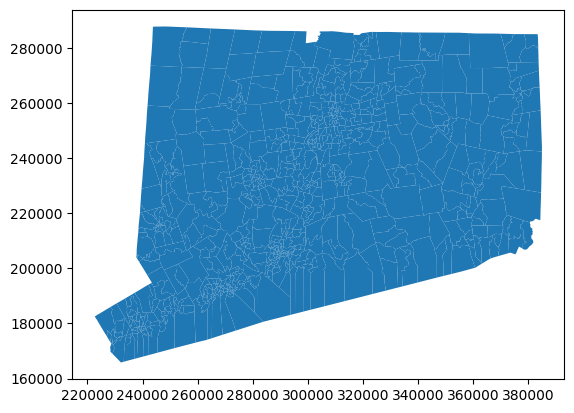

In [99]:
election_df.plot()

Convert to string and strip spaces, then convert to numeric

In [100]:
election_df["CD"] = pd.to_numeric(election_df["CD"].astype(str).str.strip(), errors='coerce')

Do some checks to make sure that the population values are nearly the same in each district

In [101]:
print(election_df.loc[election_df["CD"] == 1, "TOTPOP"].sum())
print(election_df.loc[election_df["CD"] == 2, "TOTPOP"].sum())
pop_vals = [election_df.loc[election_df["CD"] == n, "TOTPOP"].sum() for n in range(1, 6)]
print(pop_vals)

715659.0
725372.0
[715659.0, 725372.0, 717651.0, 726330.0, 720932.0]


We need to check our dataframe to see how many null values we have

In [102]:
missing_percentage = election_df.isnull().mean() * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
STATEFP20     0.000000
COUNTYFP20    0.000000
NAME20        0.000000
G16PREDCLI    0.000000
G16PRERTRU    0.000000
G16PRELJOH    0.000000
G16PREGSTE    0.000000
G16PREOWRI    0.000000
G16USSDBLU    0.000000
G16USSRCAR    0.000000
G16USSLLIO    0.000000
G16USSGRUS    0.000000
G16USSOWRI    0.000000
geometry      0.000000
TOTPOP        0.269179
HISP          0.269179
NH_WHITE      0.269179
NH_BLACK      0.269179
NH_AMIN       0.269179
NH_ASIAN      0.269179
NH_NHPI       0.269179
NH_OTHER      0.269179
NH_2MORE      0.269179
VAP           0.269179
HVAP          0.269179
WVAP          0.269179
BVAP          0.269179
AMINVAP       0.269179
ASIANVAP      0.269179
NHPIVAP       0.269179
OTHERVAP      0.269179
2MOREVAP      0.269179
CD            0.000000
dtype: float64


As the previous cell shows, we do have null values. Let's inspect further. 

In [103]:
# Show rows with missing values
rows_with_missing_values = election_df[election_df.isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing_values)

# Show columns with missing values
columns_with_missing_values = election_df.columns[election_df.isnull().any()]
print("\nColumns with missing values:")
print(columns_with_missing_values)


Rows with missing values:
    STATEFP20 COUNTYFP20             NAME20  G16PREDCLI  G16PRERTRU  \
500        09        009  East Haven 001-03         102          73   
501        09        009  East Haven 005-03          53          33   

     G16PRELJOH  G16PREGSTE  G16PREOWRI  G16USSDBLU  G16USSRCAR  ...  VAP  \
500           1           2           0         123          31  ...  NaN   
501           1           0           0          64          13  ...  NaN   

     HVAP  WVAP BVAP  AMINVAP  ASIANVAP  NHPIVAP  OTHERVAP  2MOREVAP  CD  
500   NaN   NaN  NaN      NaN       NaN      NaN       NaN       NaN   3  
501   NaN   NaN  NaN      NaN       NaN      NaN       NaN       NaN   3  

[2 rows x 33 columns]

Columns with missing values:
Index(['TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN',
       'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP',
       'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP'],
      dtype='object')


Let's go ahead and replace those null values with 0

In [104]:
election_df.fillna(0, inplace=True)

After filling in the null values, let's ensure there are no null values left

In [105]:
rows_with_missing_values = election_df[election_df.isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing_values)

# Show columns with missing values
columns_with_missing_values = election_df.columns[election_df.isnull().any()]
print("\nColumns with missing values:")
print(columns_with_missing_values)


Rows with missing values:
Empty GeoDataFrame
Columns: [STATEFP20, COUNTYFP20, NAME20, G16PREDCLI, G16PRERTRU, G16PRELJOH, G16PREGSTE, G16PREOWRI, G16USSDBLU, G16USSRCAR, G16USSLLIO, G16USSGRUS, G16USSOWRI, geometry, TOTPOP, HISP, NH_WHITE, NH_BLACK, NH_AMIN, NH_ASIAN, NH_NHPI, NH_OTHER, NH_2MORE, VAP, HVAP, WVAP, BVAP, AMINVAP, ASIANVAP, NHPIVAP, OTHERVAP, 2MOREVAP, CD]
Index: []

[0 rows x 33 columns]

Columns with missing values:
Index([], dtype='object')


One more sanity check for null values

In [106]:
election_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP20   743 non-null    object  
 1   COUNTYFP20  743 non-null    object  
 2   NAME20      743 non-null    object  
 3   G16PREDCLI  743 non-null    int64   
 4   G16PRERTRU  743 non-null    int64   
 5   G16PRELJOH  743 non-null    int64   
 6   G16PREGSTE  743 non-null    int64   
 7   G16PREOWRI  743 non-null    int64   
 8   G16USSDBLU  743 non-null    int64   
 9   G16USSRCAR  743 non-null    int64   
 10  G16USSLLIO  743 non-null    int64   
 11  G16USSGRUS  743 non-null    int64   
 12  G16USSOWRI  743 non-null    int64   
 13  geometry    743 non-null    geometry
 14  TOTPOP      743 non-null    float64 
 15  HISP        743 non-null    float64 
 16  NH_WHITE    743 non-null    float64 
 17  NH_BLACK    743 non-null    float64 
 18  NH_AMIN     743 non-null    float64 
 19  

No null values and our shape file is now ready to be exported

In [107]:
election_df.to_file("./CT/CT.shp")